In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [2]:
pca = PCA(n_components = 0.95)

In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]

In [5]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]

In [6]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()

In [7]:
train_use = train.drop(["clientnum",  "gender", "attrition_flag"], axis = 1)

In [8]:
num = []
cat = []
columns = list(train_use.columns)
for col in columns:
    if is_numeric_dtype(train_use[col]):
        num.append(col)
    elif is_string_dtype(train_use[col]):
        cat.append(col)

In [9]:
def column_transform(df, columns):
    new_df = df.copy()
    for col in columns:
        if is_numeric_dtype(df[col]):
            ct = ColumnTransformer([("min_max", min_max, [col])])
            new_df[col + "_scaled"] = ct.fit_transform(df)
        elif is_string_dtype(df[col]):
            elements = sorted(df[col].unique())
            ct2 = ColumnTransformer([("ohe", one_hot, [col])])
            if len(elements) > 2:
                x = ct2.fit_transform(df).toarray()
            elif len(elements) <= 2:
                x = np.array(ct2.fit_transform(df))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
    new_df = new_df.drop(columns, axis = 1)
    return new_df

In [10]:
train_renewed = column_transform(train_use, list(train_use.columns))
train_renewed["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
train_renewed["clientnum"] = train["clientnum"]
train_renewed = train_renewed.clean_names()
train_renewed.head()

,customer_age_scaled,dependent_count_scaled,education_level_college,education_level_doctorate,education_level_graduate,education_level_high_school,education_level_post_graduate,education_level_uneducated,education_level_unknown,marital_status_divorced,...,marriage_education_single_unknown,marriage_education_unknown_college,marriage_education_unknown_doctorate,marriage_education_unknown_graduate,marriage_education_unknown_high_school,marriage_education_unknown_post_graduate,marriage_education_unknown_uneducated,marriage_education_unknown_unknown,attrition_flag,clientnum
0,0.595745,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,806407308
1,0.531915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,801786483
2,0.404255,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,779870883
3,0.574468,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,720336708
4,0.468085,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,716769783


In [11]:
train_renewed.shape

(8101, 66)

In [12]:
train_pca = train_renewed.drop(["attrition_flag","clientnum"], axis = 1)
new_arr = pca.fit_transform(train_pca)

In [13]:
pd.DataFrame(new_arr)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.795503,-0.226910,0.341962,-0.202441,0.044155,-0.043318,0.800696,-0.951606,-0.116051,0.139421,...,0.094271,-0.344403,-0.302595,0.666573,-0.193599,0.064384,-0.002762,-0.110004,-0.121196,0.013471
1,0.847126,-0.579913,0.326023,0.870583,-0.148649,0.022750,-0.158496,0.175429,0.884198,0.027312,...,-0.128073,0.067123,-0.062787,-0.064014,0.031328,0.103029,0.011832,-0.097328,-0.046211,-0.081124
2,0.817661,-0.554485,0.014187,0.934907,0.805889,0.145797,-0.055200,0.219793,0.091094,-0.373349,...,0.017555,-0.137069,0.011345,-0.070327,-0.076440,-0.233998,0.084520,-0.052839,-0.034632,-0.075767
3,-0.640360,-0.244915,0.045923,-0.060128,0.915408,0.121017,0.201465,0.079000,0.123870,-0.244850,...,0.006955,0.009004,0.009968,-0.090199,-0.098963,-0.100247,0.084225,0.154403,-0.411214,0.018949
4,-0.856425,0.852603,0.374967,0.123978,0.107548,-0.006263,-0.162088,-0.265471,-0.226131,0.104394,...,0.012937,-0.063977,0.017093,0.032685,0.024048,0.236809,-0.134835,-0.074166,0.018059,-0.018127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0.075010,-0.409993,-0.749043,0.563449,-0.333149,-0.072643,0.309771,0.698845,-0.305576,0.467033,...,0.016636,-0.081441,-0.349459,-0.062908,-0.003489,-0.039954,-0.379897,0.382760,-0.015136,0.687558
8097,-0.685036,-0.740492,0.067798,0.900601,0.098612,0.011808,-0.209469,-0.129514,-0.046626,0.123438,...,0.023736,0.159226,0.049454,0.085083,0.081640,-0.057658,-0.006944,-0.189958,0.039940,-0.065363
8098,-0.648366,-0.298982,-0.681956,-0.586083,-0.169652,-0.924070,-0.348251,-0.129713,-0.203410,-0.227092,...,-0.502049,0.187003,-0.230997,0.119476,-0.066560,-0.063807,0.030113,-0.074718,0.053054,0.081487
8099,-0.637146,-0.470781,0.221753,-0.626324,-0.001178,0.886874,-0.500827,-0.338970,-0.255536,0.488490,...,0.491227,-0.180661,-0.182156,0.111222,-0.002273,-0.123260,0.157971,0.434227,0.050704,0.007809


In [14]:
pca = PCA()
pca.fit(train_pca)

PCA()

In [15]:
pca_values = pca.explained_variance_ratio_

In [16]:
dim = np.arange(0,len(pca_values))

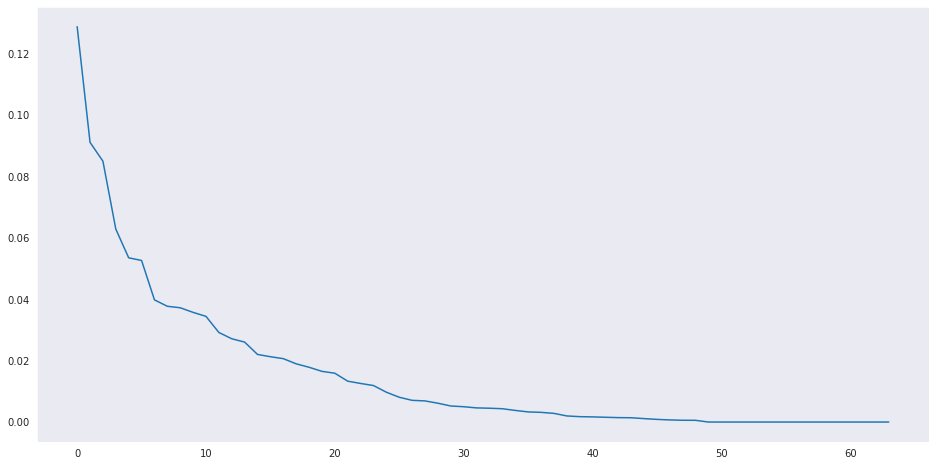

In [17]:
plt.figure(figsize = (16,8))
sns.lineplot(x = dim, y = pca_values, markers = "o")
plt.show();

In [18]:
pca_sum_values = list(np.cumsum(pca.explained_variance_ratio_))

In [19]:
len(pca_values), len(dim)

(64, 64)

In [20]:
pca_sumval_arr = np.array(pca_sum_values)

In [22]:
d_95 = len(pca_sumval_arr[(pca_sumval_arr <= 0.95) == True]) + 1

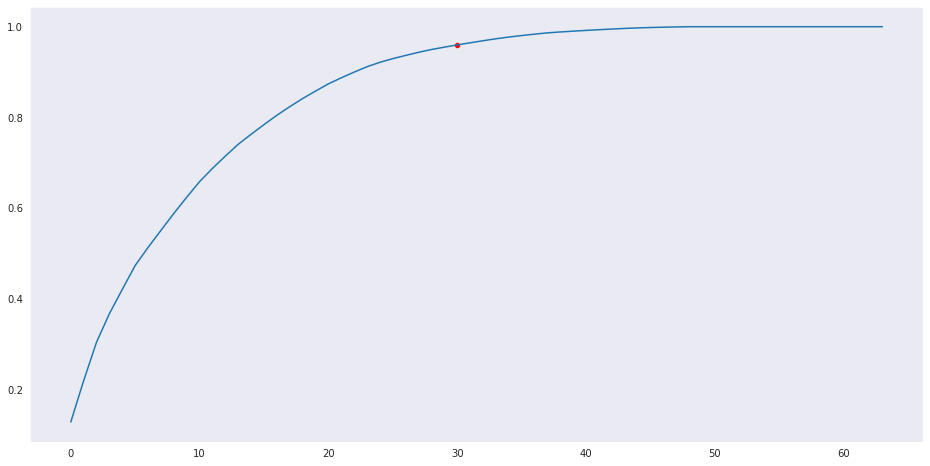

In [23]:
plt.figure(figsize = (16,8))
sns.lineplot(x = dim, y = pca_sum_values)
sns.scatterplot(x = [30], y = pca_sumval_arr[d_95], color = "red")
plt.show();